In [2]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
csv_path = os.path.join("data", "reduced_texas_df.csv")
csv2_path = os.path.join("data", "jared_reduced_texas_df.csv")
print(csv_path)
print(csv2_path)


data\reduced_texas_df.csv
data\jared_reduced_texas_df.csv


In [4]:
texas_df = pd.read_csv(csv_path, encoding="utf-8")
texas_df.head(5)
texas2_df = pd.read_csv(csv2_path, encoding="utf-8")

texas2_df.head()


,ID,TMC,Severity,Start_Time,End_Time,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,261002,201.0,2,16:03,11/30/2016 17:20,Clear,Day,Day,Day,Day
1,261003,201.0,2,16:32,11/30/2016 17:47,Clear,Day,Day,Day,Day
2,261004,201.0,2,16:31,11/30/2016 17:46,Clear,Day,Day,Day,Day
3,261005,201.0,2,16:06,11/30/2016 17:27,NaN,Day,Day,Day,Day
4,261006,201.0,3,16:35,11/30/2016 17:49,NaN,Day,Day,Day,Day


In [5]:
texas_df['Start_Time'] = pd.to_datetime(texas_df['Start_Time'], errors='coerce')

In [6]:
hour_texas_df = texas_df['Start_Time'].dt.hour


hour_texas_df.head(20)

0     16.0
1     16.0
2     16.0
3     16.0
4     16.0
5     16.0
6     16.0
7     16.0
8     15.0
9     16.0
10    16.0
11    16.0
12    15.0
13    16.0
14    16.0
15    16.0
16    16.0
17    17.0
18    16.0
19    17.0
Name: Start_Time, dtype: float64

In [7]:
bins = [0, 4, 8, 12, 16, 20, 24]

hour_groups = ["Midnight to 4am", "4am to 8am", "8am to Noon", "Noon to 4pm","4pm to 8pm", "8pm to Midnight"]


In [8]:
pd.cut(hour_texas_df, bins, labels=hour_groups).head(20)

0     Noon to 4pm
1     Noon to 4pm
2     Noon to 4pm
3     Noon to 4pm
4     Noon to 4pm
5     Noon to 4pm
6     Noon to 4pm
7     Noon to 4pm
8     Noon to 4pm
9     Noon to 4pm
10    Noon to 4pm
11    Noon to 4pm
12    Noon to 4pm
13    Noon to 4pm
14    Noon to 4pm
15    Noon to 4pm
16    Noon to 4pm
17     4pm to 8pm
18    Noon to 4pm
19     4pm to 8pm
Name: Start_Time, dtype: category
Categories (6, object): ['Midnight to 4am' < '4am to 8am' < '8am to Noon' < 'Noon to 4pm' < '4pm to 8pm' < '8pm to Midnight']

In [9]:
texas_df["Hour Group"] = pd.cut(hour_texas_df, bins, labels=hour_groups)
texas_df.head()

,ID,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Description,City,State,...,Temperature(F),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour Group
0,261002,201.0,2,2016-11-30 16:03:00,11/30/2016 17:20,30.336502,-97.755646,Accident on RM-2222 Northland Dr at Mo Pac Exp...,Austin,TX,...,66.0,10.0,5.8,NaN,Clear,Day,Day,Day,Day,Noon to 4pm
1,261003,201.0,2,2016-11-30 16:32:00,11/30/2016 17:47,30.328165,-97.694305,Accident on Grand Canyon Dr between Westheimer...,Austin,TX,...,62.1,10.0,4.6,NaN,Clear,Day,Day,Day,Day,Noon to 4pm
2,261004,201.0,2,2016-11-30 16:31:00,11/30/2016 17:46,30.326077,-97.692307,Accident on Saint Johns Ave at Cameron Rd.,Austin,TX,...,62.1,10.0,4.6,NaN,Clear,Day,Day,Day,Day,Noon to 4pm
3,261005,201.0,2,2016-11-30 16:06:00,11/30/2016 17:27,32.856014,-97.513084,#2 lane blocked and right hand shoulder blocke...,Fort Worth,TX,...,NaN,NaN,NaN,NaN,NaN,Day,Day,Day,Day,Noon to 4pm
4,261006,201.0,3,2016-11-30 16:35:00,11/30/2016 17:49,32.797668,-97.212090,#2 lane blocked and right hand shoulder blocke...,Fort Worth,TX,...,NaN,NaN,NaN,NaN,NaN,Day,Day,Day,Day,Noon to 4pm


In [10]:
texas_df["Hour Group"].value_counts()

4am to 8am         98683
8am to Noon        88538
Noon to 4pm        79150
4pm to 8pm         74193
8pm to Midnight    19139
Midnight to 4am    13309
Name: Hour Group, dtype: int64

In [11]:
texas_df["Hour Group"].value_counts().to_dict()

{'4am to 8am': 98683,
 '8am to Noon': 88538,
 'Noon to 4pm': 79150,
 '4pm to 8pm': 74193,
 '8pm to Midnight': 19139,
 'Midnight to 4am': 13309}

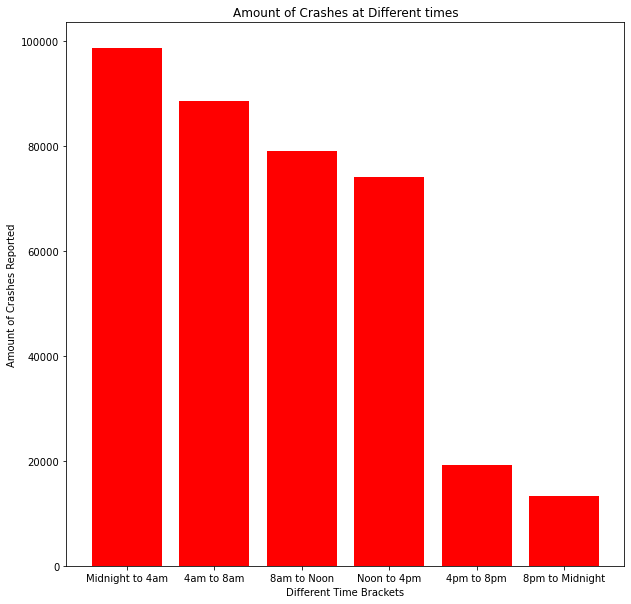

In [13]:
hour_groups = ["Midnight to 4am", "4am to 8am", "8am to Noon", "Noon to 4pm","4pm to 8pm", "8pm to Midnight"]

hour_nums = [98683, 88538, 79150, 74193, 19139, 13309]
plt.figure(figsize=(10,10))
plt.bar(hour_groups, hour_nums, color="r", align="center")
plt.title("Amount of Crashes at Different times")
plt.xlabel("Different Time Brackets")
plt.ylabel("Amount of Crashes Reported")

plt.savefig("data/fig1.png")